# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier



---
## Step 0: Load The Data

In [1]:
   
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import cv2
import glob
import numpy as np

y_train_valid_test =[]
X_train_valid_test =[]
for image_file in glob.iglob("./GTSRB/Final_Training/**/*.ppm" , recursive = True):
    y_train_valid_test.append(int(image_file.split('\\')[2]))
    image = cv2.imread(image_file)
    im = np.array(image)
    #print (im.shape)
    out_im = []
    im = cv2.resize(im,(32,32))
    X_train_valid_test.append(im)
    #print (im.shape)
print ("Number of all samples:" , len(y_train_valid_test))


Number of all samples: 39209


In [2]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train_valid_test, y_train_valid_test = shuffle(X_train_valid_test, y_train_valid_test)

X_train, X_valid_test, y_train, y_valid_test = train_test_split(X_train_valid_test,y_train_valid_test,test_size=0.4,train_size=0.6)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test,y_valid_test,test_size=0.5,train_size=0.5)

X_train = np.array(X_train)
X_test = np.array(X_test)
X_valid = np.array(X_valid)

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [23]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = int(len(np.unique(y_train)))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 23525
Number of validation examples = 7842
Number of testing examples = 7842
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random
import numpy as np
import pandas as pd
%matplotlib inline
random.seed(9999)

df = pd.read_csv('signnames.csv')

def get_name(id):
    return str(str(id) + "-"+df[df.ClassId == id]['SignName'].tolist()[0])

# plt.figure(figsize=(20,15))
# for i in range(10):
#     index = random.randint(0, len(X_train))
#     image = X_train[index]
#     plt.subplot(3,5,i+1)
#     plt.title(get_name(y_train[index]))
#     plt.imshow(image)

----

## Step 2: Design and Test a Model Architecture


### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [27]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def normalize_image(image):
    maxx = 255
    minx = 0
    a=0.1
    b=0.9
    return a+(image-minx)*(b-a) / (maxx-minx)

#Simple pre processing step by denormalizing images
def pre_process_images(arr):
    arr = arr.astype('float32')
    for i in range(arr.shape[0]):
        arr[i] = normalize_image(arr[i])
    return arr
    

X_train = pre_process_images(X_train)
X_test = pre_process_images(X_test)
X_valid = pre_process_images(X_valid)

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


### Model Architecture

In [28]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 15
BATCH_SIZE = 128

#Similar to LeNet with some mods:
#Multipling the output of convolution layers by 4 (was 6 for one channel , now they are 24)
#Adding one more fully conntect layer - a total of four to reduce from 1600 to 43
#implement dropout for all fully connected layers -  except for the flattining

def LeNet_traffic_sign(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    with tf.name_scope('Layer_1_conv') as scope:
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x24.
        conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 24), mean = mu, stddev = sigma))
        conv1_b = tf.Variable(tf.zeros(24))
        conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

        # SOLUTION: Activation.
        conv1 = tf.nn.relu(conv1)

        # SOLUTION: Pooling. Input = 28x28x24. Output = 14x14x24.
        conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x64.
    with tf.name_scope('Layer_2_Conv') as scope:
        conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 24, 64), mean = mu, stddev = sigma))
        conv2_b = tf.Variable(tf.zeros(64))
        conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

        # SOLUTION: Activation.
        conv2 = tf.nn.relu(conv2)

        # SOLUTION: Pooling. Input = 10x10x64. Output = 5x5x64.
        conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x64. Output = 1600.
    with tf.name_scope('Layer_3_flatten') as scope:
        fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 1600. Output = 480.
    with tf.name_scope('Layer_4_FC1') as scope:
        fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 480), mean = mu, stddev = sigma))
        fc1_b = tf.Variable(tf.zeros(480))
        fc1   = tf.matmul(fc0, fc1_W) + fc1_b

        # SOLUTION: Activation.
        fc1    = tf.nn.relu(fc1)
        #Adding dropout to see if it helps
        fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 480. Output = 240.
    with tf.name_scope('Layer_5_FC12') as scope:
        fc12_W  = tf.Variable(tf.truncated_normal(shape=(480, 240), mean = mu, stddev = sigma))
        fc12_b  = tf.Variable(tf.zeros(240))
        fc12    = tf.matmul(fc1, fc12_W) + fc12_b

        # SOLUTION: Activation.
        fc12    = tf.nn.relu(fc12)
        #Adding dropout to see if it helps
        fc12 = tf.nn.dropout(fc12, keep_prob)
    
    
    # SOLUTION: Layer 4: Fully Connected. Input = 240. Output = 84.
    with tf.name_scope('Layer_6_FC2') as scope:
        fc2_W  = tf.Variable(tf.truncated_normal(shape=(240, 84), mean = mu, stddev = sigma))
        fc2_b  = tf.Variable(tf.zeros(84))
        fc2    = tf.matmul(fc12, fc2_W) + fc2_b

        # SOLUTION: Activation.
        fc2    = tf.nn.relu(fc2)

        #Adding dropout to see if it helps
        fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    with tf.name_scope('Layer_7_out') as scope:
        fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
        fc3_b  = tf.Variable(tf.zeros(43))
        logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

# Training Pipeline

Create a training pipeline that uses the model to classify the data.

In [29]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32, 3), name='x')
y = tf.placeholder(tf.int32, (None), name='y')

#implement dropoff
keep_prob = tf.placeholder(tf.float32) # probability to keep units
#Onr hot encoding for y
one_hot_y = tf.one_hot(y, 43)

rate = 0.0005

logits = LeNet_traffic_sign(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model Evaluation

In [31]:
predictions = tf.argmax(logits, 1)
correct_prediction = tf.equal(predictions, tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y ,keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Create a training pipeline that uses the model to classify the data.

In [32]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y ,keep_prob: 0.75})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './traffic_sign_lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.689

EPOCH 2 ...
Validation Accuracy = 0.894

EPOCH 3 ...
Validation Accuracy = 0.938

EPOCH 4 ...
Validation Accuracy = 0.961

EPOCH 5 ...
Validation Accuracy = 0.974

EPOCH 6 ...
Validation Accuracy = 0.979

EPOCH 7 ...
Validation Accuracy = 0.979

EPOCH 8 ...
Validation Accuracy = 0.982

EPOCH 9 ...
Validation Accuracy = 0.982

EPOCH 10 ...
Validation Accuracy = 0.988

EPOCH 11 ...
Validation Accuracy = 0.986

EPOCH 12 ...
Validation Accuracy = 0.985

EPOCH 13 ...
Validation Accuracy = 0.991

EPOCH 14 ...
Validation Accuracy = 0.990

EPOCH 15 ...
Validation Accuracy = 0.991

Model saved


# Evaluating the model using the test set

In [33]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\traffic_sign_lenet
Test Accuracy = 0.992


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

### Visually inspect the first 100 sample of the final test dataset
#### Looks good also.....

INFO:tensorflow:Restoring parameters from .\traffic_sign_lenet


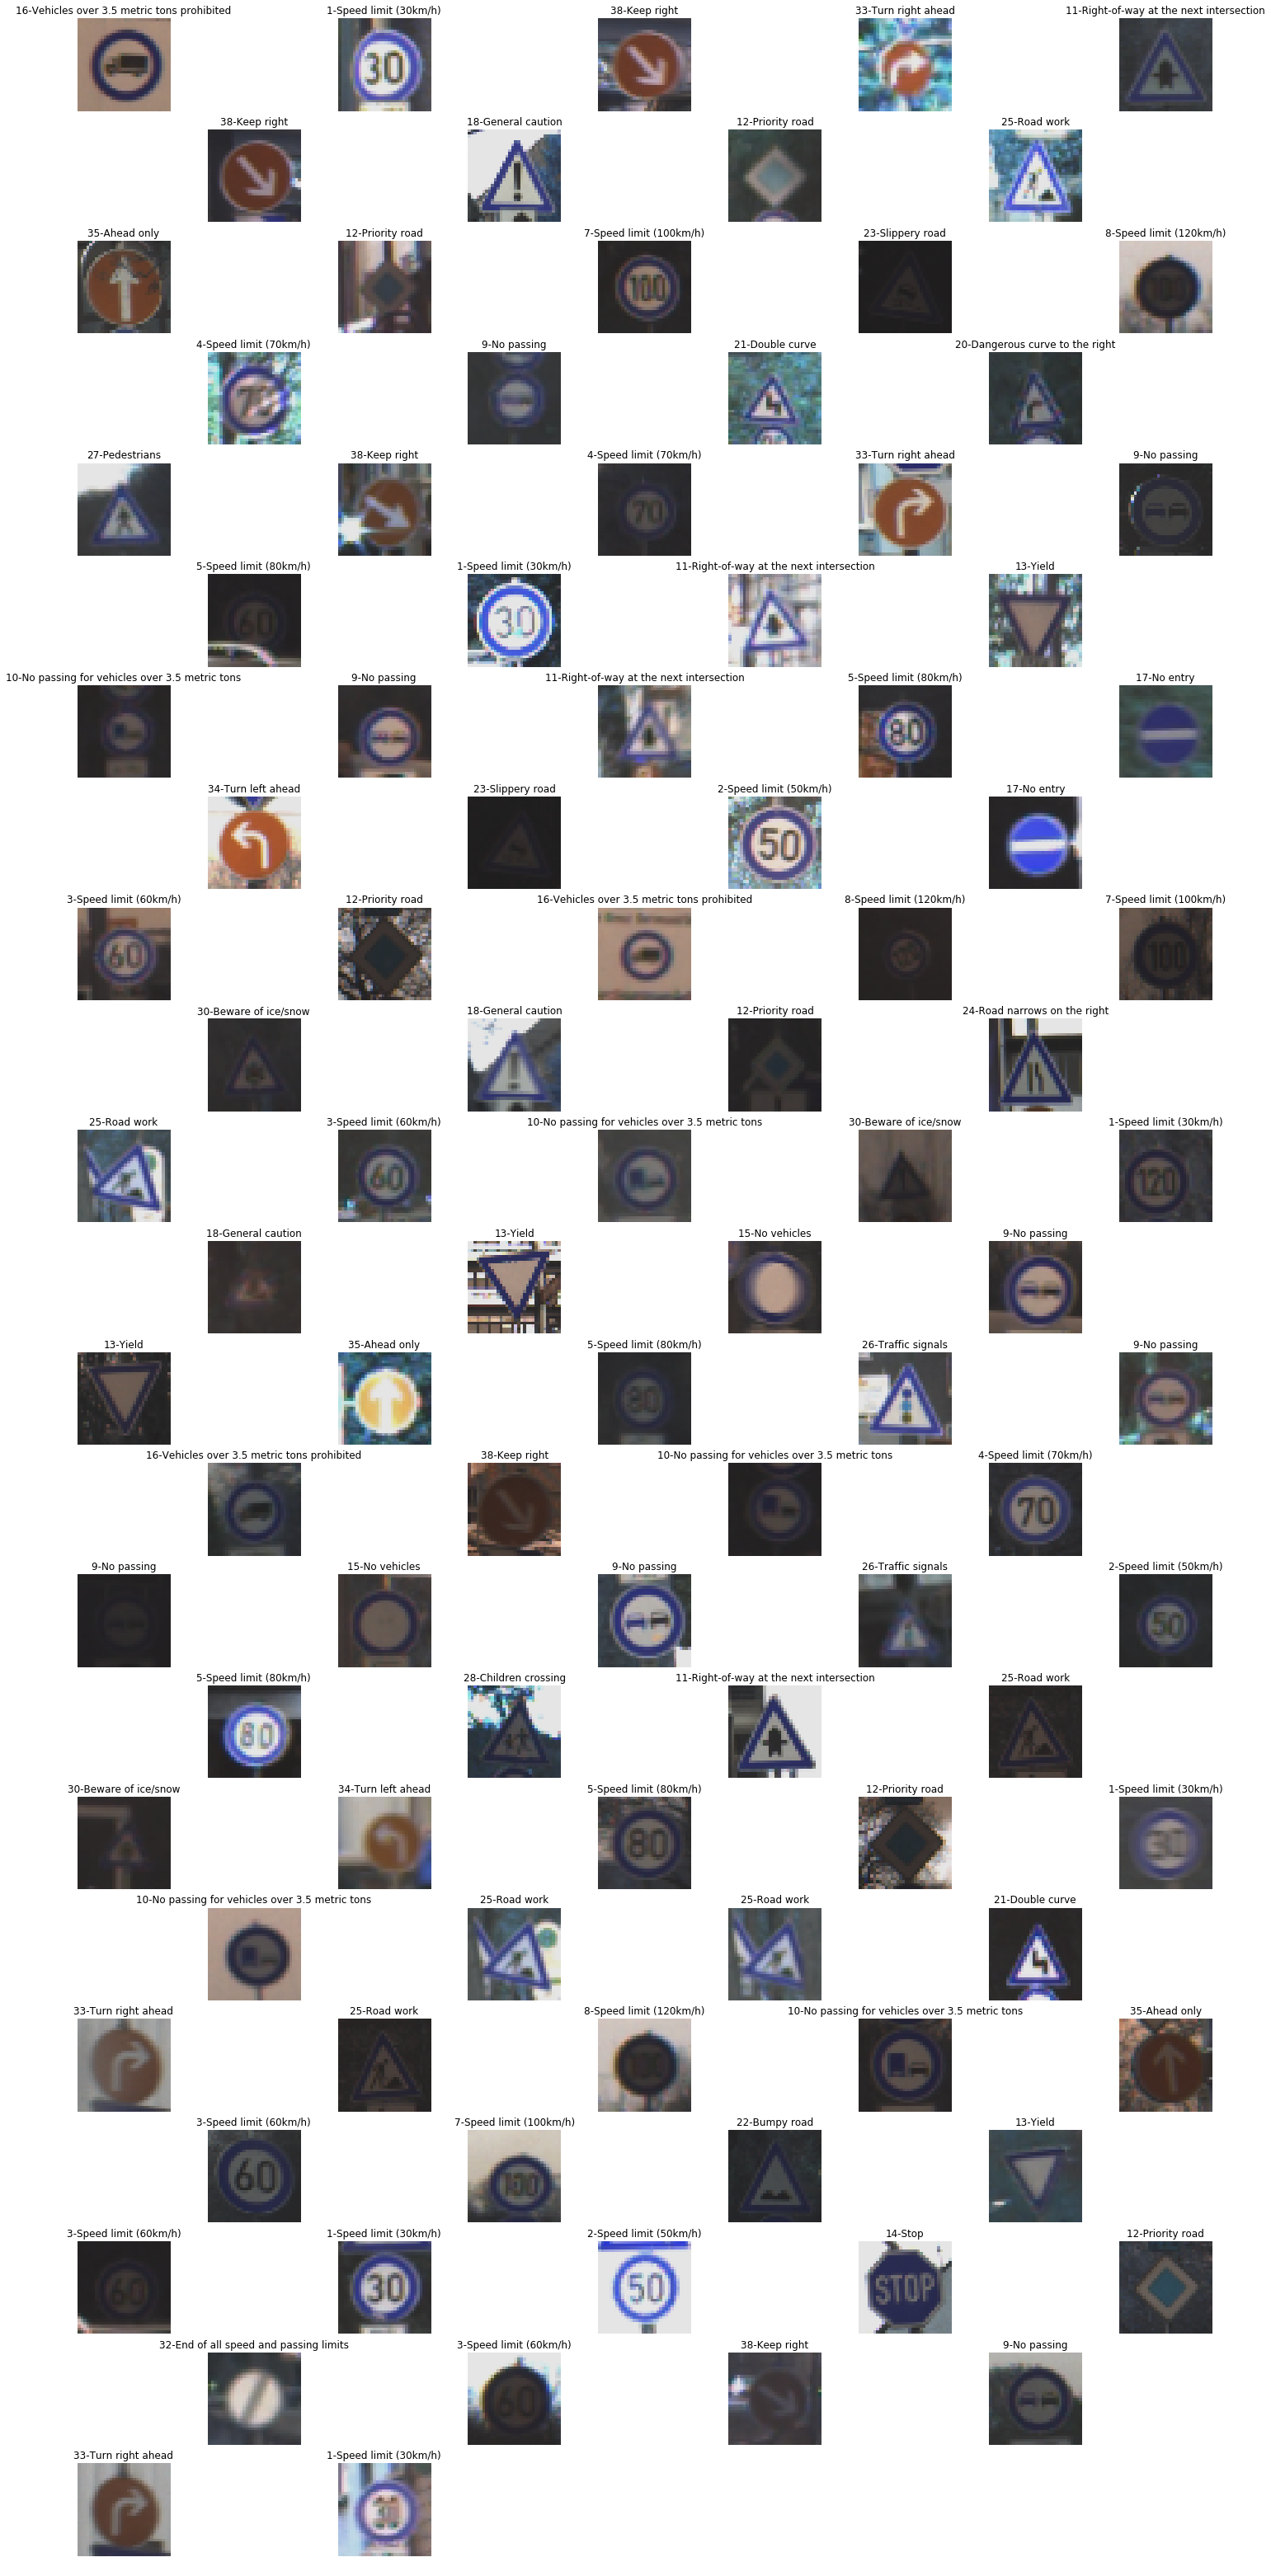

In [53]:
y_extra_image_label2 =[]
X_extra_image_test2 =[]

for image_file in glob.iglob("./extra_images/images/**/*.ppm" , recursive = True):
    #y_extra_image_label.append(int(image_file.split('\\')[2]))
    y_extra_image_label2.append(0)
    image = cv2.imread(image_file)
    im = np.array(image)
    #print (im.shape)
    out_im = []
    im = cv2.resize(im,(32,32))
    X_extra_image_test2.append(im)

X_extra_image_test2 = np.array(X_extra_image_test2).astype('float32')
X_extra_image_test2 = pre_process_images(X_extra_image_test2)

### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    #test_accuracy = evaluate(X_extra_image_test, y_extra_image_label)
    #print("Test Accuracy = {:.3f}".format(test_accuracy))
    preds = predictions.eval(feed_dict={x: X_extra_image_test2 ,keep_prob: 1.0})
    
plt.figure(figsize=(25,250))
#fig = plt.figure()
#for i in range(len(X_extra_image_test)):
#fig, ax = plt.subplots(nrows=2,ncols=2)
image_count = len(X_extra_image_test2)
with tf.Session() as sess:
    #print (topk.values[0].eval())
    for i in range(image_count):
        image = X_extra_image_test2[i]
        plt.subplot(image_count,9,2*i+1)
        plt.axis('off')
        plt.title(get_name(preds[i]))
        plt.imshow(image)     